In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp tools

# Getting the data through scraping

> Get the financial data from EDGAR's database

## Seting up the tools

Initiate a conda repo

> conda create -n my_env

Install the Python library to scrape data from SEC Edgar API 

> uv add edgartools

Import package

In [ ]:
#| export

from edgar import set_identity
import pandas as pd

Set your identity

In [ ]:
set_identity("Ramon Pozuelo rapozueloruiz@gmail.com")

Now you can import Companies

In [ ]:
#| export
from edgar import Company

In [ ]:
apple = Company("AAPL")
# apple

Get the filing that we want (10 K of the previous year)

In [ ]:
fillings = apple.get_filings(form="10-K", year=2024)
# fillings = apple.get_filings(form="10-K").latest()

Access the filing data

In [ ]:
apple_latest_10K = fillings.latest()
apple_latest_10K

To donwload the filing content:

In [ ]:
tenk = apple_latest_10K.obj()
tenk

The relevant information for the accounting is in : 
+ Item 7  Management’s Discussion and Analysis (MD&A)

In [ ]:
tenk["Item 7"]

In [ ]:
apple.balance_sheet()

In [ ]:
microsoft = Company("MSFT")
microsoft.balance_sheet(as_dataframe=True)

In [ ]:
df = microsoft.balance_sheet(as_dataframe=True)

In [ ]:
df.head()

# Manual notes

📈 **Total Revenue**  
+ **What it is**: The total amount of money a company earns from its business activities, like selling products or services, before any costs or expenses are deducted.

+ **Where it appears**: First line of the Income Statement (also called the Consolidated Statement of Operations).

+ **Why it matters**: It shows the company’s ability to generate sales.

💰 **Net Income**
+ **What it is**: The company’s profit after subtracting all expenses, taxes, and costs from total revenue.

+ Formula:  
> Net Income = Total Revenue - Total Expenses

+ **Where it appears**: Bottom line of the Income Statement.

+ **Why it matters**: It reflects the company’s overall profitability1
.

🏢 **Total Assets**
What it is: Everything the company owns that has value—cash, inventory, buildings, equipment, patents, etc.

+ **Where it appears**: Top half of the Balance Sheet.

+ **Why it matters**: It shows the scale and resource base of the company


📉 **Total Liabilities**
+ **What it is**: All the debts and obligations the company owes—loans, accounts payable, accrued expenses, etc.

+ **Where it appears**: Bottom half of the Balance Sheet, usually under or alongside shareholders’ equity.

+ **Why it matters**: It indicates how much the company owes and its financial risk exposure2
.

🔄 **Cash Flow from Operating Activities**
+ **What it is**: The cash generated or used by the company’s core business operations (e.g., selling products, paying suppliers).

+ **Where it appears**: First section of the Cash Flow Statement.

+ **Why it matters**: It shows whether the company’s day-to-day operations are generating enough cash to sustain the business
.

In [ ]:
columns = ["Company", "Year",
            "Total Revenue", "Net Income", 
            "Total Assets", "Total Liabilities", 
            "Cash Flow from Operations"]


In [ ]:

# In millions except for share amounts 
rows = [
      # [" company ", year, TReven, NIncome, TAssets, TLiab, CashFlOp
        ["Microsoft", 2025, 281724, 101832, 619003, 191791, 93520],
        ["Microsoft", 2024, 245122, 88136,  512163,  ],
        ["Microsoft", 2023, 211915, 72,361,   ],
        ["Apple", 2024, 391035, 101832, 619003, 191791, 93520],
        ["Apple", 2023, 383285, 101832, 619003, 191791, 93520],
        ["Apple", 2022, 394328, 101832, 619003, 191791, 93520],
        
        ]

Microsoft 10K

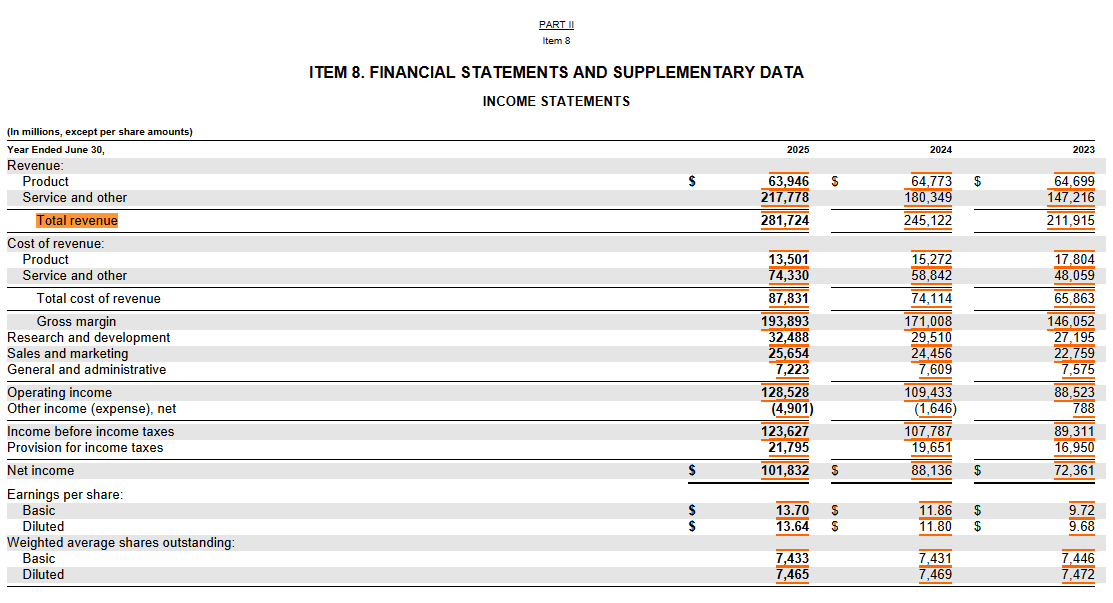

Microsoft Net income

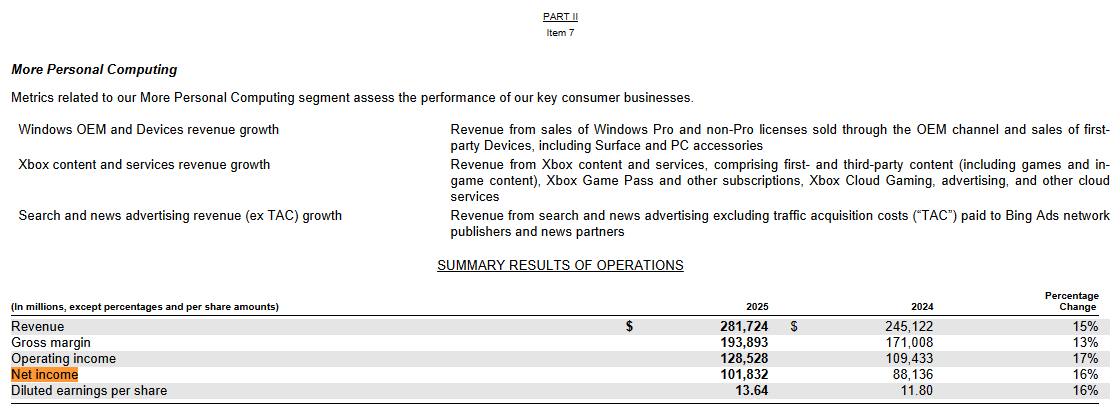

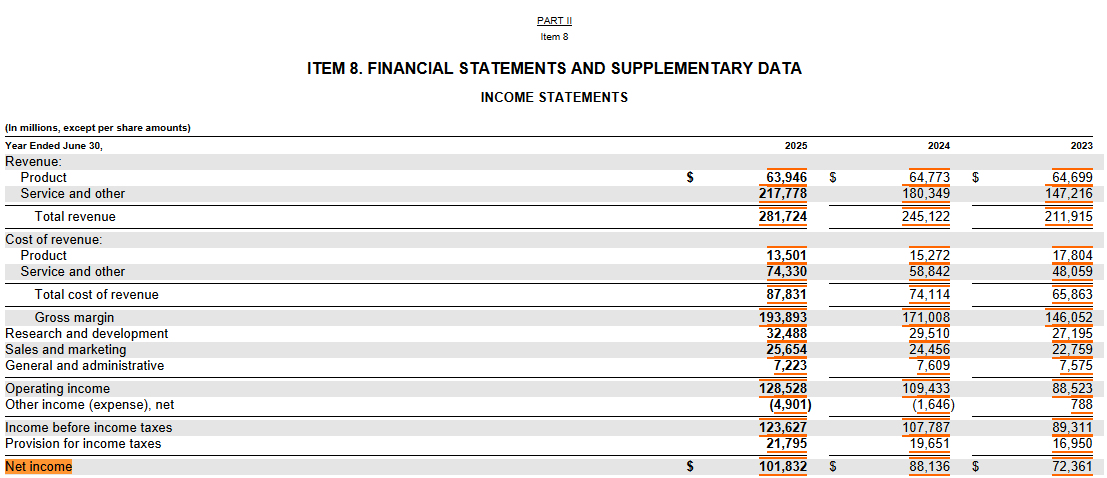

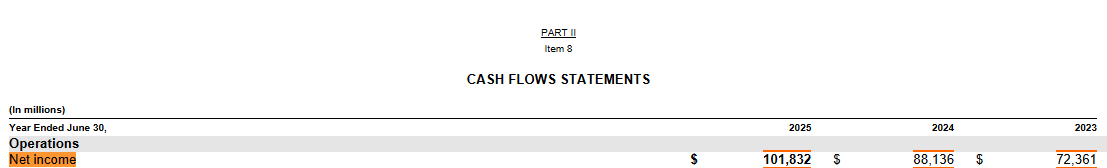

Net income appears in multiple places and with the same values.
In the previous pictures: Item 7, Item 8 (Income Statements), Item 8 (Cash Flow Statements), Item 8 (Income Statements), Item 8 (STOCKHOLDERS’ EQUITY STATEMENTS)

Total Assets:
In Balance Sheets     
|   2025    |    2024 |
|-----------|---------|
| $ 619,003 | $512,163|

 

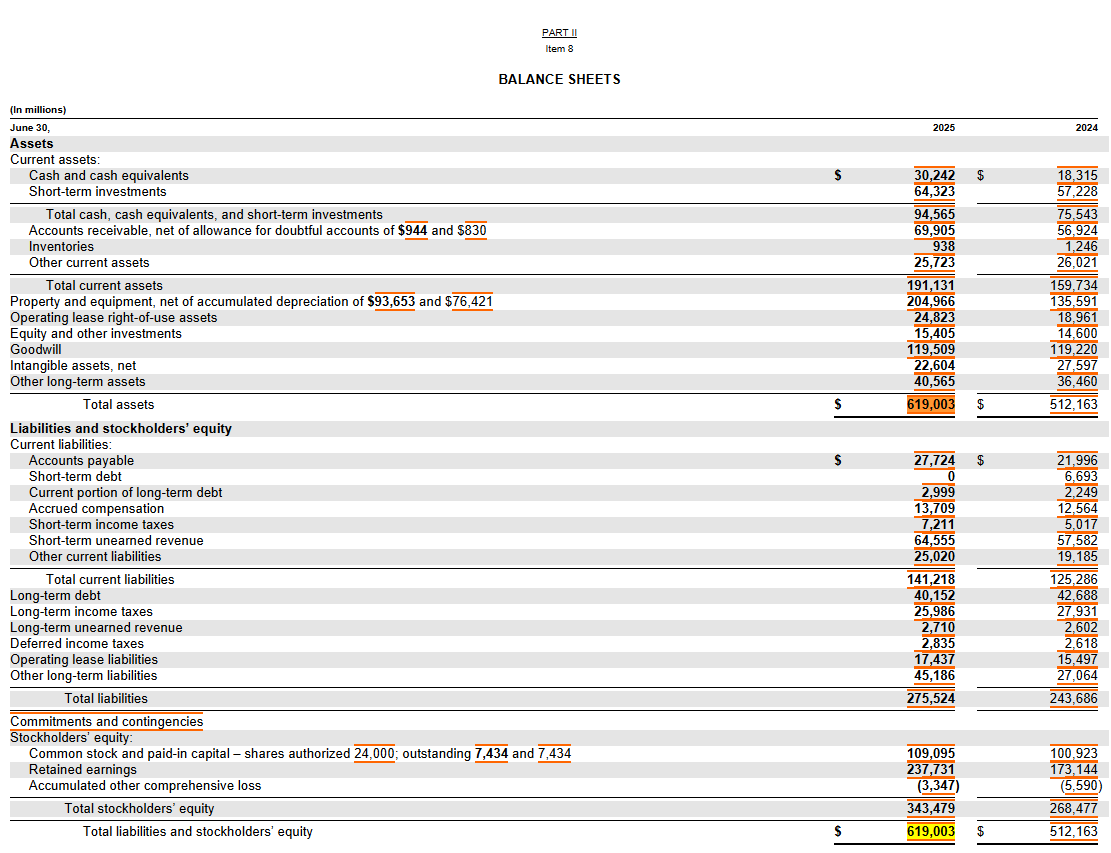

Liabilities

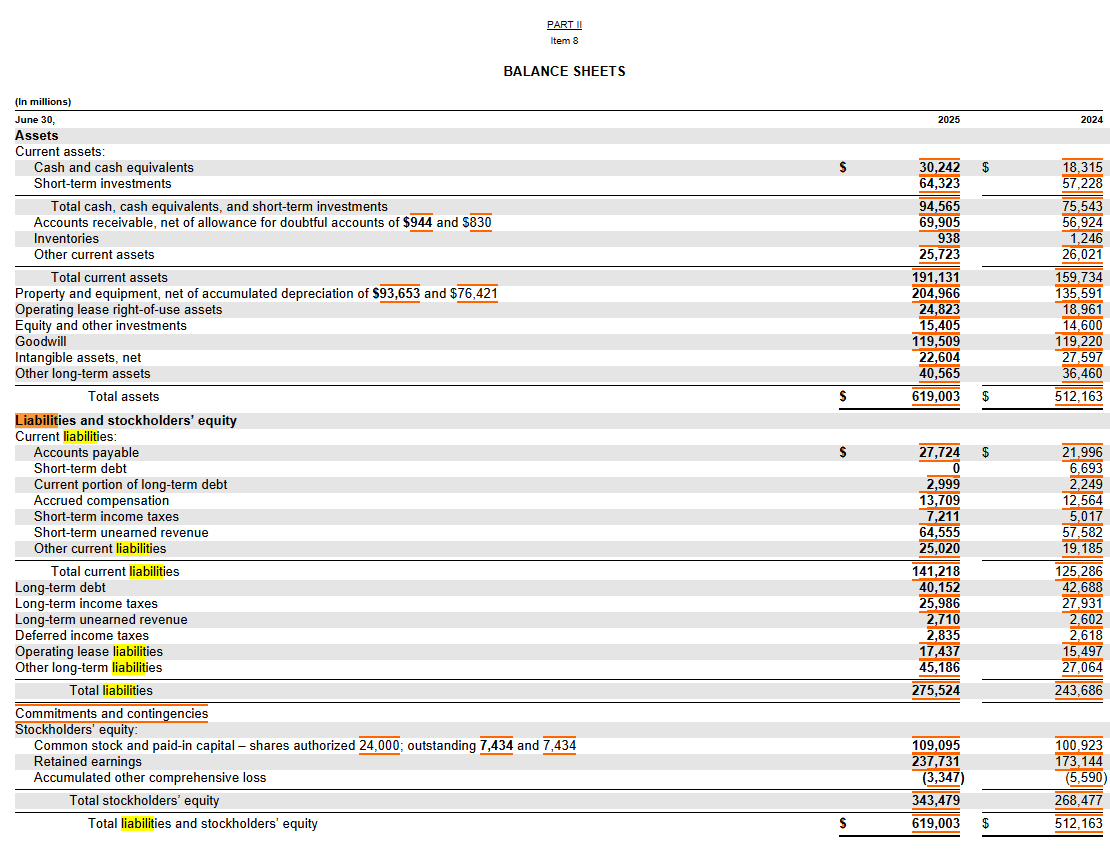

Cash Flow

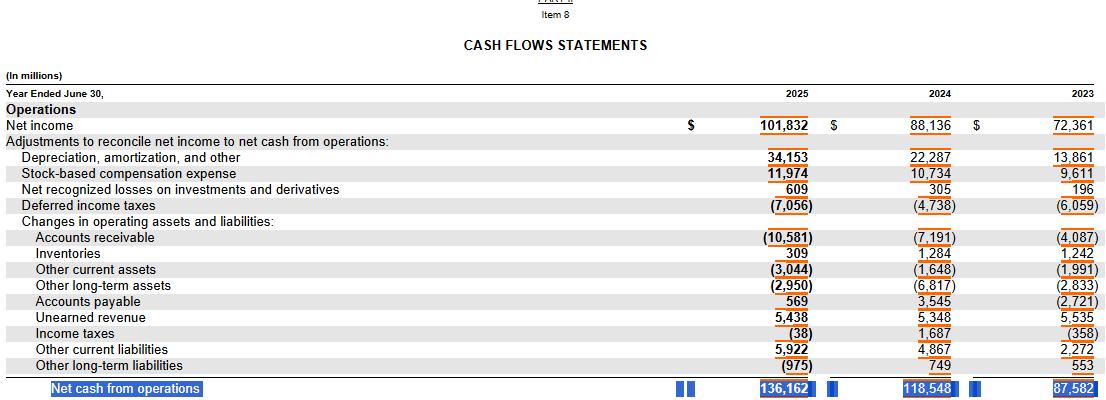

Apple

Total revenue / Total net sales

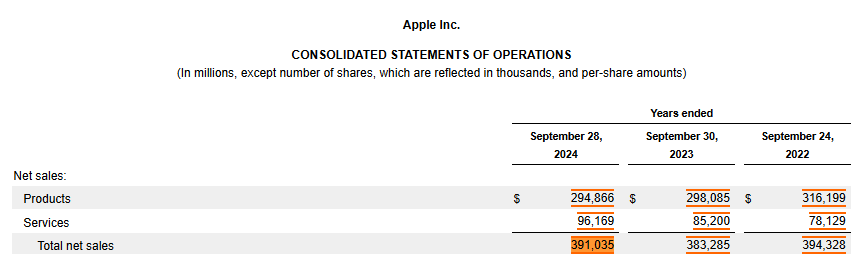

# Test to get the total revenue for apple and microsoft

With this code I get the full text of each section or "Item"

In [ ]:
apple10k = apple.get_filings(form="10-K").latest().obj()
print(apple10k.items)
print(100*"-")
print()
n="7"
print(apple10k[f"Item {n}"])

Now Let's try to import with xbrl

In [ ]:
apple10k = apple.get_filings(form="10-K").latest().xbrl()
display(apple10k)

In [ ]:
dir(apple10k)

In [ ]:
apple10k.statements.income_statement()

In [ ]:
dir(apple10k.facts)

In [ ]:
apple10k.facts.search_facts("Net")

In [ ]:
apple10k.facts.to_dataframe()